In [34]:
import pandas as pd
import numpy as np

SPAM_FEATURES = [
    # Word frequency.
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # Frequency of special characters.
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # Continuous sequence of CAPITALS.
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
]

column_names = ['id'] + SPAM_FEATURES + ['spam']
training_data = pd.read_csv('./data/spam_train.csv', names=column_names, encoding="big5")
training_data.loc[:, 'spam'] = training_data.loc[:, 'spam'].map(lambda x: 'Spam' if x==1 else 'Not spam')

from collections import defaultdict
transformed_data = defaultdict(list)
spam = training_data.loc[:, 'spam']
for feature in SPAM_FEATURES:
    data = training_data.loc[:, feature].apply(pd.to_numeric).values.flatten()
    transformed_data['feature'] = np.append(transformed_data['feature'], np.array([feature]*data.shape[0]))
    transformed_data['value'] = np.append(transformed_data['value'], data)
    transformed_data['spam'] = np.append(transformed_data['spam'], spam)

processed_data = pd.DataFrame(transformed_data, columns=['value', 'feature', 'spam'])

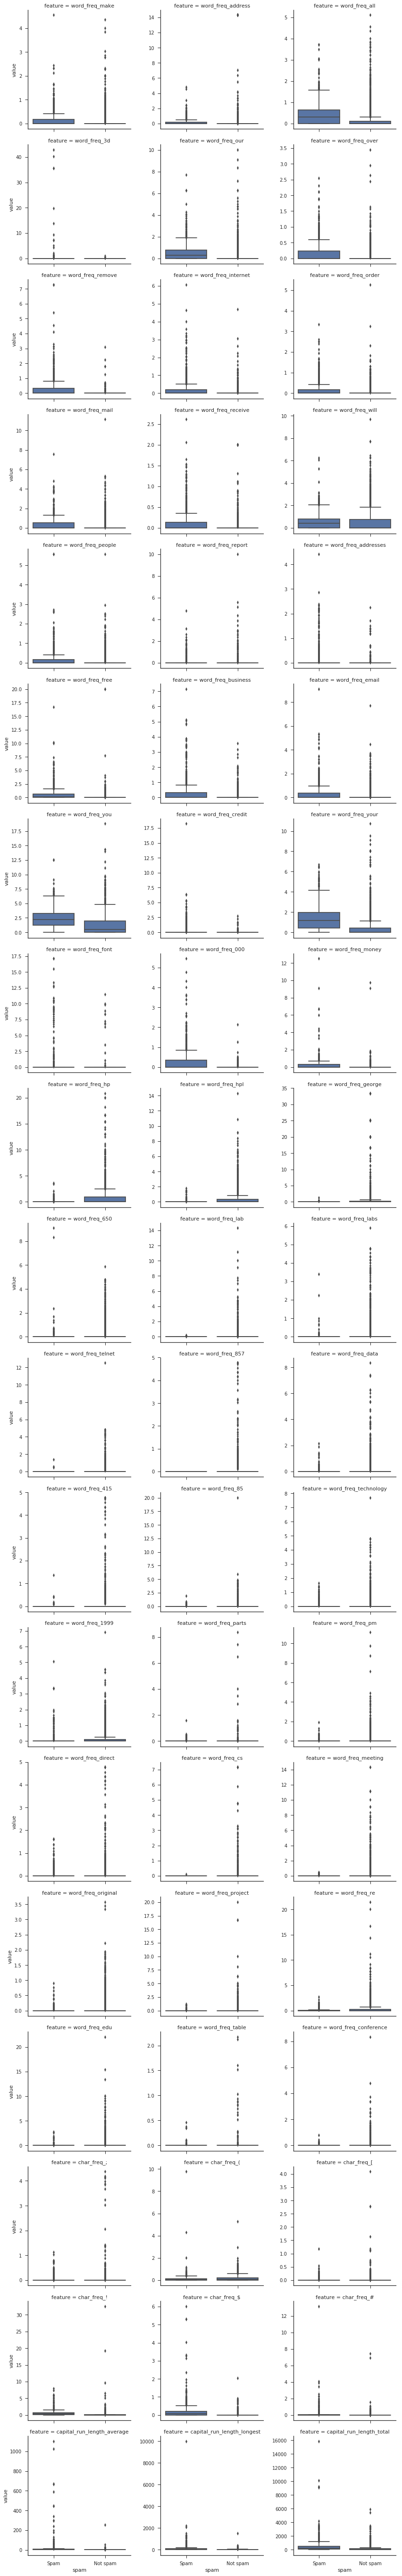

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(processed_data, col="feature", col_wrap=3, size=4, aspect=1, sharey=False)
g = g.map(sns.boxplot, "spam", "value")
plt.show()